In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

file_key_1 = 'Tabular-Playground-Sep-2022/train.csv'
file_key_2 = 'Tabular-Playground-Sep-2022/test.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

## Reading data-files
train = pd.read_csv(file_content_stream_1)
train['date'] = pd.to_datetime(train['date'], format = '%Y-%m-%d')

test = pd.read_csv(file_content_stream_2)
test['date'] = pd.to_datetime(test['date'], format = '%Y-%m-%d')

# Train Dataset Exploration

In [ ]:
train.head(20)

In [ ]:
train['date'].describe()

In [ ]:
train['product'].value_counts()

In [ ]:
train['store'].value_counts()

In [ ]:
train['country'].value_counts()

In [ ]:
pd.crosstab(train['country'], train['store'])

# Looking at some specific series

In [2]:
data_temp = train[(train['country'] == 'Belgium') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Advanced Techniques')].reset_index(drop = True)
data_temp

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,48,2017-01-02,Belgium,KaggleMart,Kaggle Advanced Techniques,514
2,96,2017-01-03,Belgium,KaggleMart,Kaggle Advanced Techniques,549
3,144,2017-01-04,Belgium,KaggleMart,Kaggle Advanced Techniques,477
4,192,2017-01-05,Belgium,KaggleMart,Kaggle Advanced Techniques,447
...,...,...,...,...,...,...
1456,69888,2020-12-27,Belgium,KaggleMart,Kaggle Advanced Techniques,574
1457,69936,2020-12-28,Belgium,KaggleMart,Kaggle Advanced Techniques,625
1458,69984,2020-12-29,Belgium,KaggleMart,Kaggle Advanced Techniques,597
1459,70032,2020-12-30,Belgium,KaggleMart,Kaggle Advanced Techniques,632


<AxesSubplot:xlabel='date', ylabel='num_sold'>

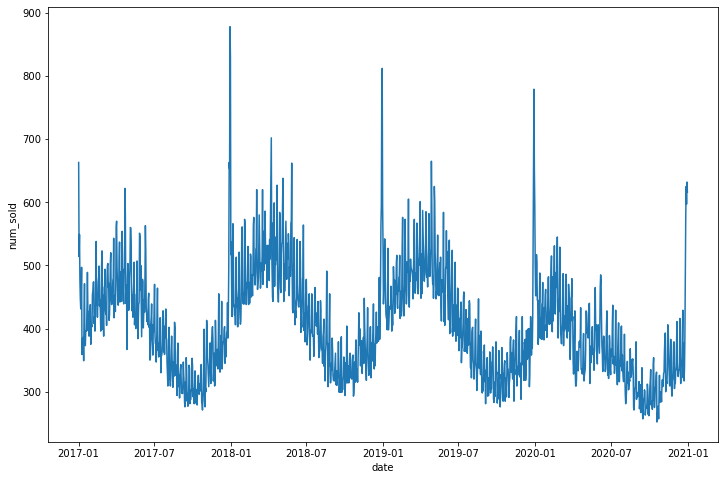

In [4]:
plt.figure(figsize = (12, 8))

sns.lineplot(x = 'date', y = 'num_sold', data = data_temp)

In [ ]:
test.head(10)

In [ ]:
test['product'].value_counts()

In [ ]:
test['store'].value_counts()

In [ ]:
test['country'].value_counts()